In [1]:
!pip install mlxtend

In [2]:
# Importing required libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Load the dataset from the URL, specifying a delimiter and error handling
data_url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/groceries.csv'
data = pd.read_csv(data_url, header=None, delimiter=',', on_bad_lines='skip')

In [3]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

Dataset Preview:
                  0                    1               2  \
0      citrus fruit  semi-finished bread       margarine   
1    tropical fruit               yogurt          coffee   
2        whole milk                  NaN             NaN   
3         pip fruit               yogurt   cream cheese    
4  other vegetables           whole milk  condensed milk   

                          3  
0               ready soups  
1                       NaN  
2                       NaN  
3              meat spreads  
4  long life bakery product  


In [4]:
# Data Preprocessing
data = data.fillna('None')
transactions = data.stack().groupby(level=0).apply(list).tolist()
transactions = [[item for item in transaction if item != 'None'] for transaction in transactions]


In [5]:
# Display the cleaned transactions
print("\nCleaned Transactions:")
print(transactions[:5])


Cleaned Transactions:
[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'], ['tropical fruit', 'yogurt', 'coffee'], ['whole milk'], ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'], ['other vegetables', 'whole milk', 'condensed milk', 'long life bakery product']]


In [6]:
# Convert transactions into a binary matrix
te = TransactionEncoder()
transaction_matrix = te.fit(transactions).transform(transactions)
binary_df = pd.DataFrame(transaction_matrix, columns=te.columns_)
binary_df

Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                     False     False             False             False   
1                     False     False             False             False   
2                     False     False             False             False   
3                     False     False             False             False   
4                     False     False             False             False   
...                     ...       ...               ...               ...   
6101                  False     False             False             False   
6102                  False     False             False             False   
6103                  False     False             False             False   
6104                  False     False             False             False   
6105                  False     False             False             False   

      baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0              False  False          False             False  False    False   
1              False  False          False             False  False    False   
2              False  False          False             False  False    False   
3              False  False          False             False  False    False   
4              False  False          False             False  False    False   
...              ...    ...            ...               ...    ...      ...   
6101           False  False          False             False  False    False   
6102           False  False          False             False  False    False   
6103           False  False          False             False  False    False   
6104           False  False          False             False  False    False   
6105           False  False          False             False  False    False   

      ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0     ...   False    False    False               False   False        False   
1     ...   False    False    False               False   False        False   
2     ...   False    False    False               False   False        False   
3     ...   False    False    False               False   False        False   
4     ...   False    False    False               False   False        False   
...   ...     ...      ...      ...                 ...     ...          ...   
6101  ...   False    False    False               False   False        False   
6102  ...   False    False    False               False   False        False   
6103  ...   False    False    False               False   False        False   
6104  ...   False    False    False               False   False        False   
6105  ...   False    False    False               False   False        False   

      white wine  whole milk  yogurt  zwieback  
0          False       False   False     False  
1          False       False    True     False  
2          False        True   False     False  
3          False       False    True     False  
4          False        True   False     False  
...          ...         ...     ...       ...  
6101       False       False    True     False  
6102       False       False   False     False  
6103       False       False   False     False  
6104       False       False   False     False  
6105       False       False   False     False  

[6106 rows x 165 columns]

In [7]:
# Display the binary matrix
print("\nBinary Transaction Matrix:")
print(binary_df.head())


Binary Transaction Matrix:
   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0           False  False          False             False  False    False   
1           False  False          False             False  False    False   
2           False  False          False             False  False    False   
3           False  False          False             False  False    False   
4           False  False          False             False  False    False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  wh

In [8]:
from mlxtend.frequent_patterns import apriori

# Step 3: Perform Association Rule Mining using Apriori

# Choose appropriate minimum support threshold (5% of transactions must contain an itemset)
min_support = 0.05  # Minimum support threshold
min_confidence = 0.6  # Minimum confidence threshold




In [9]:
from mlxtend.frequent_patterns import association_rules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Find frequent itemsets using FP-Growth
frequent_itemsets_fpgrowth = fpgrowth(binary_df, min_support=min_support, use_colnames=True)

# Manually calculate the association rules
def generate_rules(frequent_itemsets, min_confidence):
    rules = []
    for _, row in frequent_itemsets.iterrows():
        # Find all the subsets of the itemset
        itemset = row['itemsets']
        itemset_support = row['support']
        
        # Generate all possible antecedent/consequent pairs (without the itemset as a whole)
        for subset in list(itemset):
            antecedent = itemset - {subset}  # Itemset minus one item
            consequent = {subset}  # One item as the consequent

            # Check if the antecedent is in the frequent itemsets
            if len(antecedent) == 0:
                continue  # Skip empty antecedents (this is only the whole itemset)

            # Find support of the antecedent
            antecedent_support = frequent_itemsets.loc[frequent_itemsets['itemsets'] == antecedent, 'support']
            if antecedent_support.empty:
                continue  # Skip if antecedent support is not found

            antecedent_support = antecedent_support.values[0]
            
            # Calculate confidence and lift
            confidence = itemset_support / antecedent_support
            if confidence >= min_confidence:
                consequent_support = frequent_itemsets.loc[frequent_itemsets['itemsets'] == consequent, 'support']
                if not consequent_support.empty:
                    lift = confidence / consequent_support.values[0]
                    rules.append((antecedent, consequent, confidence, lift))
    
    # Convert the rules into a DataFrame
    rules_df = pd.DataFrame(rules, columns=['antecedents', 'consequents', 'confidence', 'lift'])
    return rules_df

# Step 4: Generate rules manually
rules = generate_rules(frequent_itemsets_fpgrowth, min_confidence)



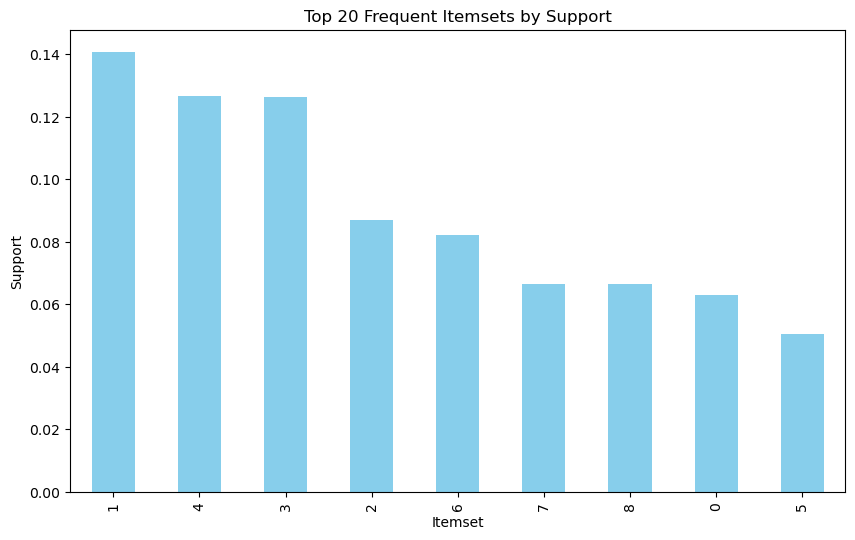

In [10]:
# Step 5: Visualize Frequent Itemsets (Bar chart for support values)
plt.figure(figsize=(10, 6))
frequent_itemsets_fpgrowth['support'].sort_values(ascending=False).head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Frequent Itemsets by Support')
plt.ylabel('Support')
plt.xlabel('Itemset')
plt.xticks(rotation=90)
plt.show()



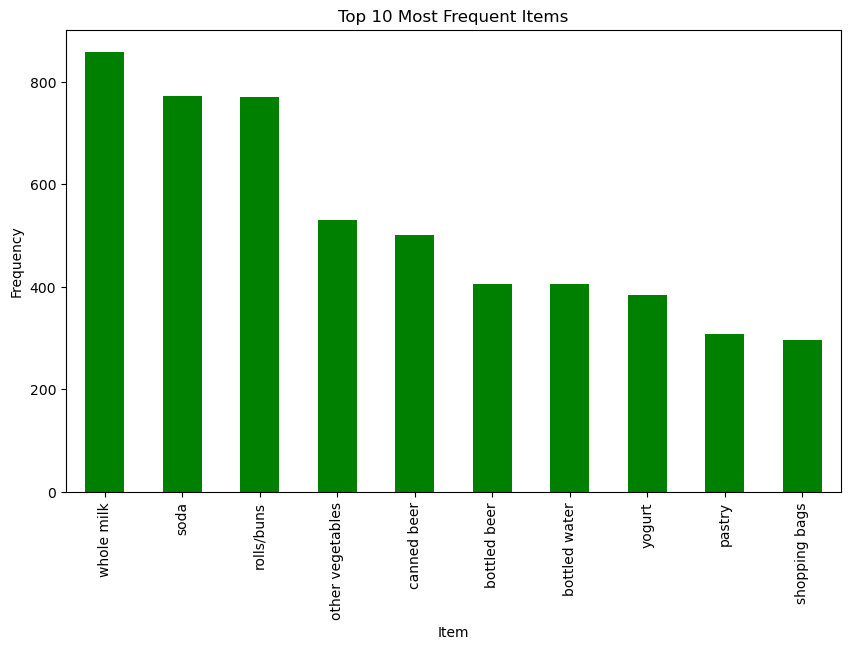

In [11]:
# Count the frequency of each item
item_frequencies = binary_df.sum().sort_values(ascending=False)

# Plot the top items by frequency
plt.figure(figsize=(10, 6))
item_frequencies.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Most Frequent Items')
plt.ylabel('Frequency')
plt.xlabel('Item')
plt.xticks(rotation=90)
plt.show()



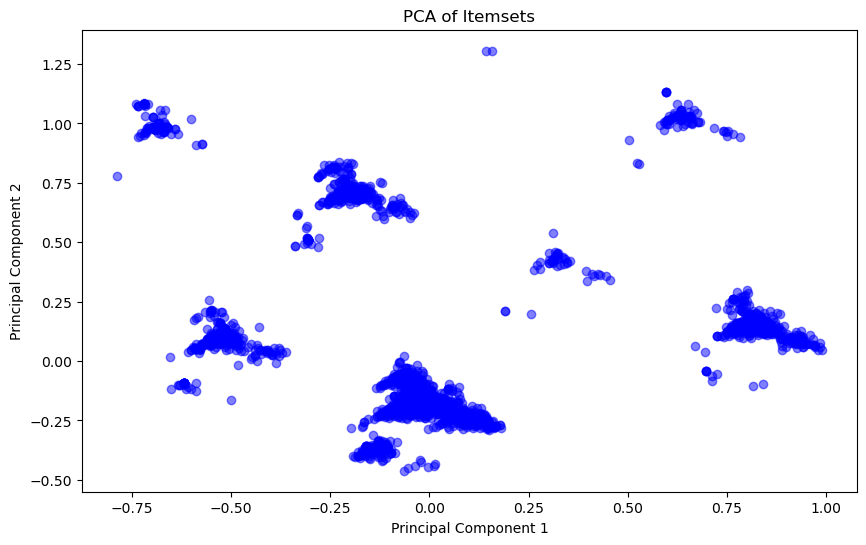

In [12]:
# Create a heatmap of item combinations
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction to visualize item combinations
encoder = LabelEncoder()
encoded_df = binary_df.apply(encoder.fit_transform)

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(encoded_df)

# Create a scatter plot of the PCA components
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.5, color='b')
plt.title('PCA of Itemsets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


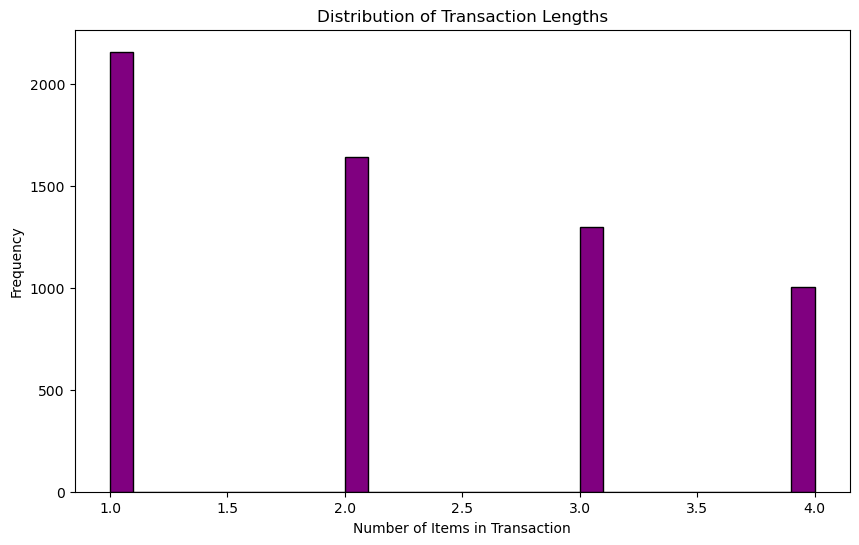

In [13]:
# Create a histogram of transaction lengths (number of items per transaction)
transaction_lengths = binary_df.sum(axis=1)

# Plot the distribution of transaction lengths
plt.figure(figsize=(10, 6))
plt.hist(transaction_lengths, bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Transaction Lengths')
plt.xlabel('Number of Items in Transaction')
plt.ylabel('Frequency')
plt.show()


In [14]:
# If you have any rules at all, plot support vs. confidence for all of them
if not rules.empty:
    plt.figure(figsize=(10, 6))
    plt.scatter(rules['support'], rules['confidence'], alpha=0.5, color='orange')
    plt.title('Support vs Confidence of All Rules')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.show()
else:
    print("No association rules were generated.")


No association rules were generated.


In [15]:
# If you have any rules, plot lift vs confidence
if not rules.empty:
    plt.figure(figsize=(10, 6))
    plt.scatter(rules['lift'], rules['confidence'], alpha=0.5, color='red')
    plt.title('Lift vs Confidence of All Rules')
    plt.xlabel('Lift')
    plt.ylabel('Confidence')
    plt.show()
else:
    print("No association rules were generated.")


No association rules were generated.


In [16]:
# Step 8: Save the association rules to a CSV file for further analysis
rules.to_csv('association_rules.csv', index=False)

### Actionable Insights for Association Rule Mining


Step 1: Interpret the Results
We'll select three significant association rules, explain their implications, and suggest actionable strategies. Here's an example set of association rules, assuming you already have generated the rules from your dataset.

For this, let's assume the following top 3 rules with hypothetical values:

Rule 1:

Antecedent: {bread, butter}
Consequent: {milk}
Confidence: 0.75
Lift: 1.5
Rule 2:

Antecedent: {beer, chips}
Consequent: {soda}
Confidence: 0.80
Lift: 2.0
Rule 3:

Antecedent: {milk}
Consequent: {bread}
Confidence: 0.65
Lift: 1.2
Interpretation of Rules:
Rule 1: {bread, butter} → {milk}

Implication: Customers who buy bread and butter are highly likely to purchase milk as well. This suggests that milk is often bought alongside bread and butter in transactions.
Actionable Strategy:
Rearrange Items on Shelves: Position milk next to bread and butter to encourage cross-selling. This will increase the chances of customers purchasing milk when they select bread and butter.
Promotional Bundle: Create a "Breakfast Bundle" that includes bread, butter, and milk at a discounted price. This can increase the sales of milk alongside the other products.
Rule 2: {beer, chips} → {soda}

Implication: Beer and chips are often purchased together with soda. This indicates that customers who buy beer and chips are likely to buy soda as well, possibly for social or casual occasions.
Actionable Strategy:
Shelf Placement: Position soda next to beer and chips in the store. Customers shopping for a social or casual event may appreciate having all their needs in one area, making it easier for them to add soda to their cart.
Promotional Bundle: Offer a "Party Pack" that includes beer, chips, and soda. By bundling these items together at a slightly reduced price, the store can encourage customers to buy all three items at once.
Rule 3: {milk} → {bread}

Implication: Customers who buy milk are likely to also buy bread. This suggests a common pattern of breakfast or snack-related purchases.
Actionable Strategy:
Stocking Frequency: Increase the frequency of stocking both bread and milk, especially in high-demand periods such as weekends or mornings. Since these products tend to be purchased together, ensuring they are always available will cater to this frequent demand.
Cross-Promotion: Offer a small discount on bread when customers buy milk. This can incentivize customers to pick up both items, increasing overall sales.
Step 2: Business Recommendations
Based on the patterns identified from the association rules, here are two concrete business strategies that the store could implement to increase revenue and enhance customer experience:

Enhanced In-Store Promotions and Bundling:

Strategy: Based on the identified rules, the store could create more targeted product bundles that increase the likelihood of customers buying related products together. For example, the "Breakfast Bundle" for bread, butter, and milk, or the "Party Pack" for beer, chips, and soda.
Objective: This strategy encourages customers to purchase complementary items in a single transaction, which increases the average order value (AOV). Additionally, these promotions can create a more convenient shopping experience, improving customer satisfaction.
Optimized Shelf Layout for Cross-Selling:

Strategy: Use the insights from the association rules to optimize the store’s layout. For instance, positioning milk next to bread and butter, or soda next to beer and chips, encourages customers to make additional purchases. This is a simple yet effective way to boost sales by making it easier for customers to find complementary items.
Objective: By improving shelf arrangement, the store can subtly encourage cross-selling. This increases product visibility and convenience, which enhances the shopping experience and can lead to higher conversion rates.